In [3]:
#tsa는 time series analysis
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt


AR모형은 ma=[1], MA모형은 ar=[1] 넣어줘야함

In [4]:
def gen_arma_samples (ar,ma,nobs):
    arma_model = ArmaProcess(ar=ar, ma=ma)
    arma_samples = arma_model.generate_sample(nobs)
    return arma_samples
def gen_random_walk_w_drift(nobs, drift):
    init = np.random.normal(size=1, loc=0)
    e = np.random.normal(size=nobs, scale=1)
    
    y=np.zeros(nobs)
    y[0] = init
    
    for t in range(1, nobs):
        y[t] = drift + 1*y[t-1] + e[t]
    return y

AR모델

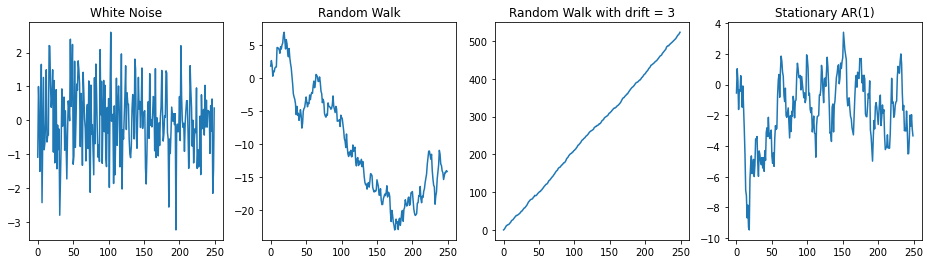

In [5]:
np.random.seed(123)

white_noise = gen_arma_samples(ar=[1], ma=[1], nobs=250)
random_walk = gen_arma_samples(ar=[1,-1], ma=[1], nobs=250)
random_walk_w_drift = gen_random_walk_w_drift(250, 2)
stationary_ar_1 = gen_arma_samples(ar=[1,-0.9], ma=[1], nobs=250)

fig, ax = plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title("White Noise")

ax[1].plot(random_walk)
ax[1].set_title("Random Walk")

ax[2].plot(random_walk_w_drift)
ax[2].set_title("Random Walk with drift = 3")

ax[3].plot(stationary_ar_1)
ax[3].set_title("Stationary AR(1)")

fig.set_size_inches(16, 4)

MA모델

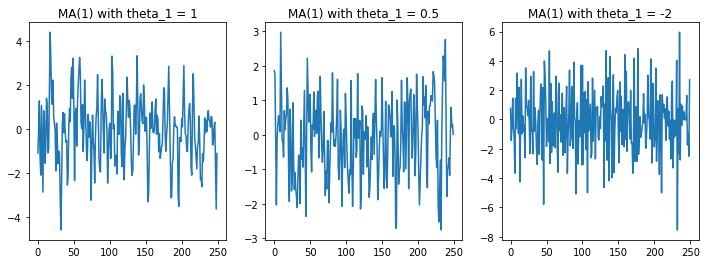

In [6]:
np.random.seed(123)

ma_1 = gen_arma_samples(ar=[1], ma=[1,1], nobs=250)
ma_2 = gen_arma_samples(ar=[1], ma=[1,0.5], nobs=250)
ma_3 = gen_arma_samples(ar=[1], ma=[1,-2], nobs=250)

fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].plot(ma_1)
ax[0].set_title("MA(1) with theta_1 = 1")

ax[1].plot(ma_2)
ax[1].set_title("MA(1) with theta_1 = 0.5")

ax[2].plot(ma_3)
ax[2].set_title("MA(1) with theta_1 = -2")

plt.show()

# 참고하던 블로그에 statsmodels.tsa.arima_model import unintegrate라 되어 있어서 계속 오류났었는데 박결형이 statsmodels.tsa.tsatools인거 찾아줌..

arma모델에서 차분한 값 원상복귀

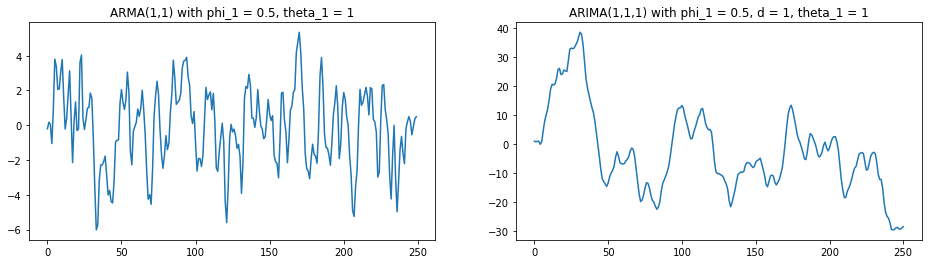

In [11]:
np.random.seed(12345)
from statsmodels.tsa.tsatools import unintegrate, unintegrate_levels


arma_1  = gen_arma_samples (ar = [1,-.5], ma = [1,1], nobs = 250) # 차분한 값이 ARMA (1,1)을 따름
arima_1 = unintegrate(arma_1, [1])                                # unintegrate: 차분한 값을 다시 원상 복귀

fig,ax = plt.subplots(1,2, figsize = (16,4))

ax[0].plot(arma_1)
ax[0].set_title("ARMA(1,1) with phi_1 = 0.5, theta_1 = 1")


ax[1].plot(arima_1)
ax[1].set_title("ARIMA(1,1,1) with phi_1 = 0.5, d = 1, theta_1 = 1")
plt.show()

In [9]:
import sys
print(sys.version)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
